In [17]:
import pandas as pd
import numpy as np

In [18]:
df_gl = pd.read_csv("./GLB.Ts+dSST.csv", header = 1, index_col = 0)
df_nh = pd.read_csv("./NH.Ts+dSST.csv", header = 1, index_col = 0)
df_sh = pd.read_csv("./SH.Ts+dSST.csv", header = 1, index_col = 0)
df_zon = pd.read_csv("./ZonAnn.Ts+dSST.csv", index_col = 0)

In [ ]:
df_gl.head()

In [ ]:
df_nh.head()

In [ ]:
df_sh.head()

In [ ]:
df_zon.head()

In [ ]:
df_gl.dtypes

In [ ]:
df_gl.info()

In [ ]:
df_nh.head()

In [ ]:
df_sh.head()

In [ ]:
df_zon

In [19]:
df_gl.dtypes

Jan    float64
Feb    float64
Mar    float64
Apr    float64
May    float64
Jun    float64
Jul    float64
Aug    float64
Sep    float64
Oct     object
Nov     object
Dec     object
J-D     object
D-N     object
DJF     object
MAM    float64
JJA    float64
SON     object
dtype: object

In [20]:
columns_to_convert = ['Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'SON']
df_gl[columns_to_convert] = df_gl[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [21]:
# Assuming 'Year' is the column containing years, convert it to a datetime index
df_gl.index = pd.to_datetime(df_gl.index, format='%Y')


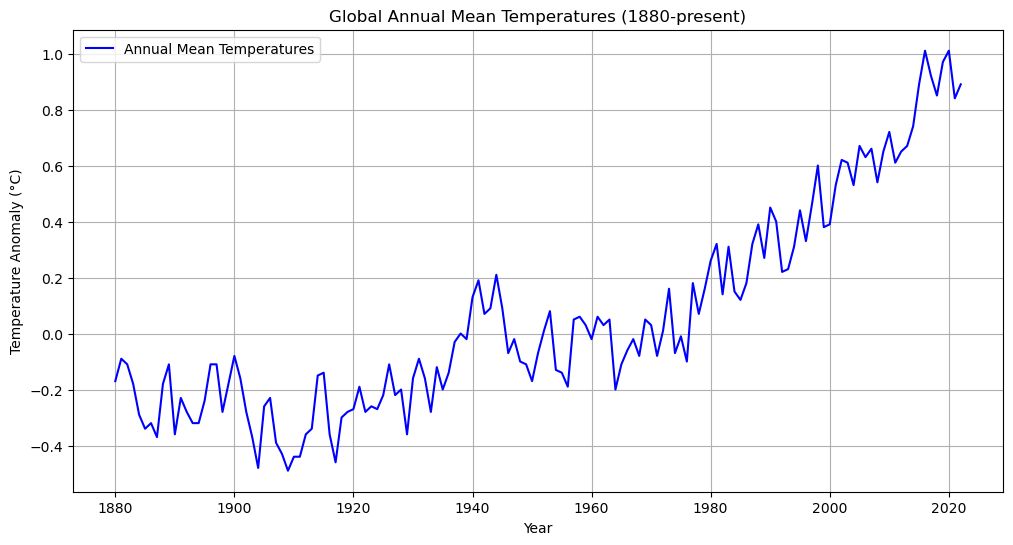

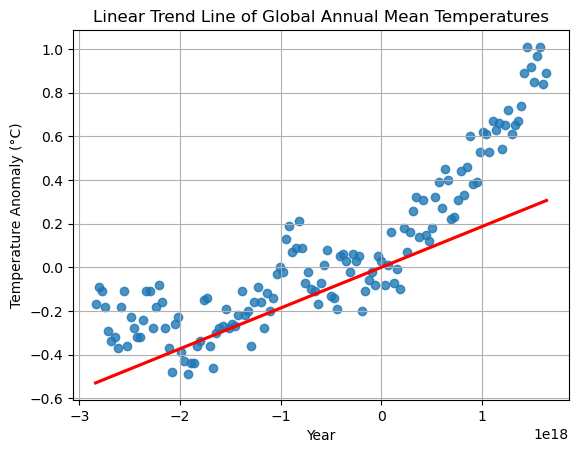

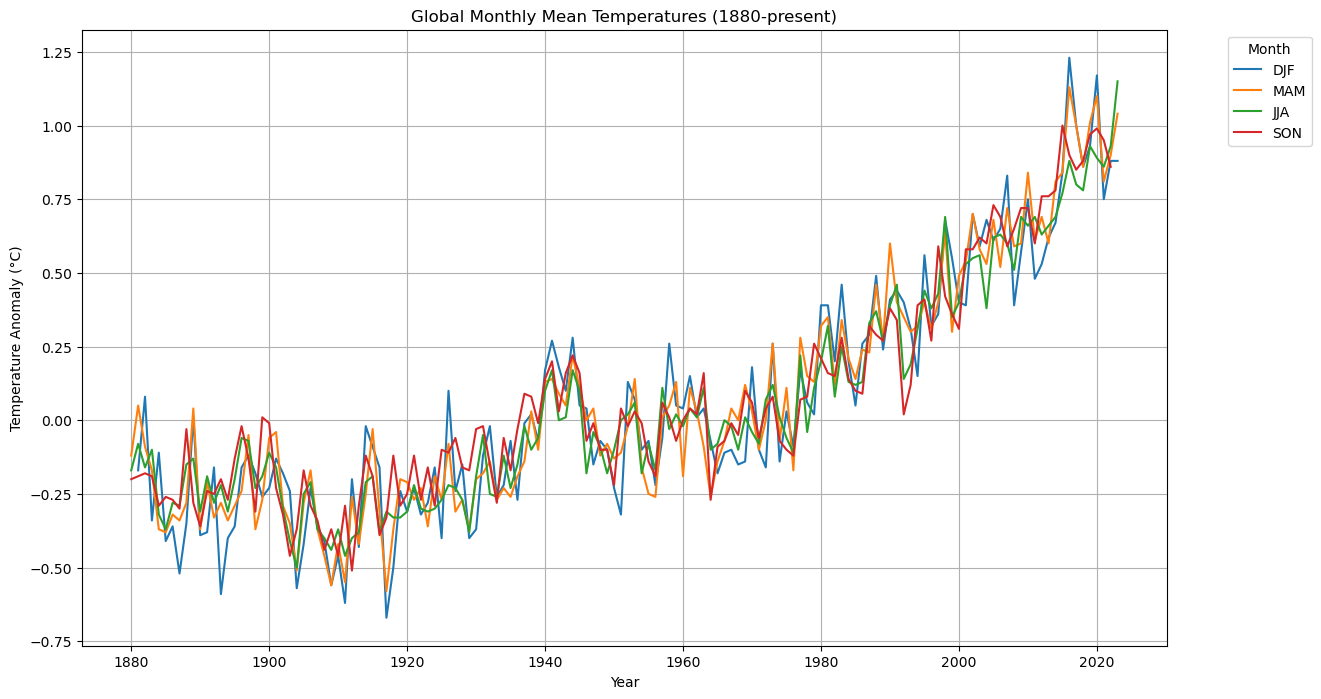

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_gl is the Global-mean dataset
# Replace it with the actual variable name if different

# Plotting Annual Mean Temperatures
plt.figure(figsize=(12, 6))
plt.plot(df_gl.index, df_gl['J-D'], label='Annual Mean Temperatures', color='blue')
plt.title('Global Annual Mean Temperatures (1880-present)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Convert Timestamp values to numeric
x_values = pd.to_numeric(df_gl.index)

# Calculating a Trend Line
sns.regplot(x=x_values, y=df_gl['J-D'], order=1, ci=None, line_kws={'color': 'red'})
plt.title('Linear Trend Line of Global Annual Mean Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

# Convert 'J-D' column to numeric, handling errors with coerce
df_gl['J-D'] = pd.to_numeric(df_gl['J-D'], errors='coerce')

# Comparing Seasons
seasonal_columns = ['DJF', 'MAM', 'JJA', 'SON']
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_gl[seasonal_columns], dashes=False)
plt.title('Global Monthly Mean Temperatures (1880-present)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


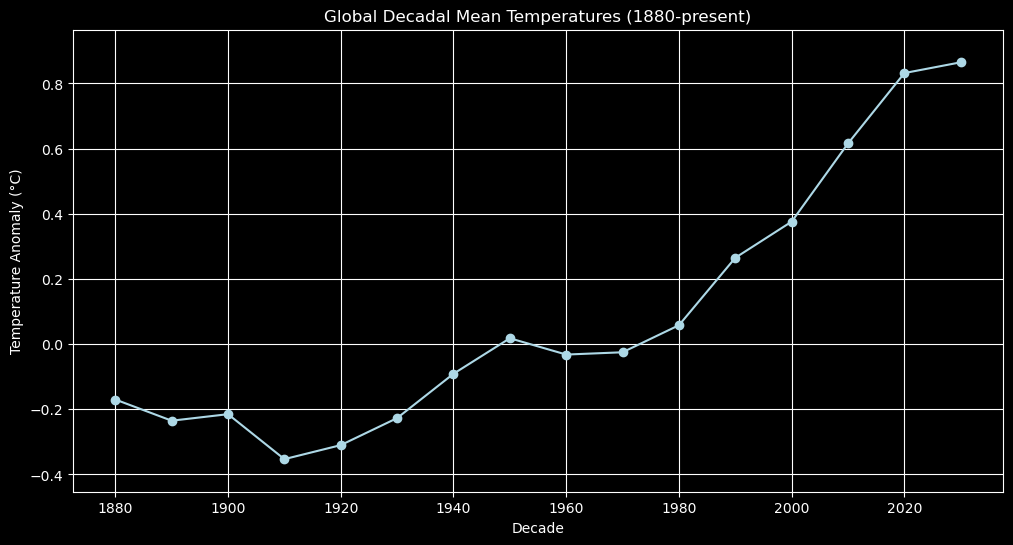

In [26]:
# Decadal Analysis
decadal_means = df_gl.resample('10Y').mean()
plt.style.use('dark_background')
# Plotting Decadal Mean Temperatures
plt.figure(figsize=(12, 6))
plt.plot(decadal_means.index.year, decadal_means['J-D'], marker='o', linestyle='-', color='lightblue')
plt.title('Global Decadal Mean Temperatures (1880-present)')
plt.xlabel('Decade')
plt.ylabel('Temperature Anomaly (°C)')
plt.ylim(decadal_means['J-D'].min() - 0.1, decadal_means['J-D'].max() + 0.1)
plt.grid(True)
plt.show()


In [24]:
# Calculate the difference in temperature between consecutive decades
decadal_diff = decadal_means['J-D'].diff()

# Identify decades with accelerated temperature changes (e.g., where the difference is above a certain threshold)
accelerated_decades = decadal_diff[decadal_diff > 0.2]
# Print the decades with accelerated temperature changes
print("Decades with Accelerated Temperature Changes:")
print(accelerated_decades)


Decades with Accelerated Temperature Changes:
Year
1990-12-31    0.207
2010-12-31    0.240
2020-12-31    0.216
Name: J-D, dtype: float64


In [ ]:
print(decadal_means)


In [ ]:
# Convert index to datetime
df_gl.index = pd.to_datetime(df_gl.index)

In [ ]:
temperature_anomaly = df_gl['J-D']

In [ ]:
temperature_anomaly = pd.Series(
    temperature_anomaly.values, index=pd.date_range("1-1-1880", periods=len(temperature_anomaly), freq="Y"), name="temp_anomaly"
)
temperature_anomaly = temperature_anomaly[:143]
temperature_anomaly

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Assuming df_gl is your global temperature anomaly DataFrame
# Make sure that the 'Year' column is set as the index and is in datetime format

# Example data loading
# df_gl = pd.read_csv('path_to_your_file.csv', index_col='Year', parse_dates=True)

# Extract the global-mean temperature anomaly time series
#temperature_anomaly = df_gl['J-D']

# Specify the frequency (assuming monthly data)
frequency = 13  # 12 months in a year

# Apply STL decomposition with the specified frequency
stl_result = STL(temperature_anomaly, seasonal=13, period = 143).fit()

# Extract components
seasonal_component, trend_component, residual_component = stl_result.seasonal, stl_result.trend, stl_result.resid

# Plot the original time series and components
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(temperature_anomaly, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(seasonal_component, label='Seasonal Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(trend_component, label='Trend Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual_component, label='Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming df_gl is your global temperature anomaly DataFrame
# Make sure that the 'Year' column is set as the index and is in datetime format

# Example data loading
# df_gl = pd.read_csv('path_to_your_file.csv', index_col='Year', parse_dates=True)

# Extract the global-mean temperature anomaly time series
#temperature_anomaly = temperature_anomaly[:]

# Apply seasonal decomposition
result = seasonal_decompose(temperature_anomaly, model='additive', period = 60)  # Adjust period based on your data frequency

# Extract components
seasonal_component = result.seasonal
trend_component = result.trend
residual_component = result.resid

# Plot the original time series and components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(temperature_anomaly, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(seasonal_component, label='Seasonal Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(trend_component, label='Trend Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual_component, label='Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df_gl is your global temperature anomaly DataFrame
# Make sure that the 'Year' column is set as the index and is in datetime format

# Example data loading
# df_gl = pd.read_csv('path_to_your_file.csv', index_col='Year')

# Extract the global-mean temperature anomaly time series
temperature_anomaly_arima = temperature_anomaly[:110]

# Create a datetime index
#temperature_anomaly.index = pd.date_range("1880-01-01", periods=len(temperature_anomaly), freq="M")

# Find the optimal parameters using auto_arima
auto_model = pm.auto_arima(temperature_anomaly_arima, suppress_warnings=True, seasonal=False)
optimal_order = auto_model.get_params()['order']

# Fit an ARIMA model with the optimal parameters
model = ARIMA(temperature_anomaly_arima, order=optimal_order)
results = model.fit()

# Forecast future values
forecast_steps = 33  # Adjust the number of steps you want to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(temperature_anomaly, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
temperature_anomaly_arima

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(temperature_anomaly[110:], forecast.predicted_mean)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(temperature_anomaly[110:], forecast.predicted_mean)
print(f'Mean Squared Error (MSE): {mse}')


In [ ]:
plt.plot(temperature_anomaly, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()


In [ ]:
from statsmodels.tsa.forecasting.stl import STLForecast

stlf = STLForecast(temperature_anomaly, ARIMA, period = 10 ,model_kwargs=dict(order=(1, 1, 3), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(25)
plt.plot(temperature_anomaly)
plt.plot(forecast)
plt.show()

In [ ]:
print(stlf_res.summary())

In [ ]:
temperature_anomaly_stl = temperature_anomaly[:110]
temperature_anomaly_stl

In [ ]:
stlf = STLForecast(temperature_anomaly_stl, ARIMA, period = 50 ,model_kwargs=dict(order=(1, 1, 3), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(60)
plt.plot(temperature_anomaly)
plt.plot(forecast)
plt.show()


In [ ]:
residuals = temperature_anomaly - forecast  # temperature_anomaly[110:] - forecast[:33]
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.show()


In [ ]:
plt.hist(residuals, bins=20, density=True)
plt.title("Histogram of Residuals")
plt.show()


In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(temperature_anomaly[110:], forecast[:33])
mse = mean_squared_error(temperature_anomaly[110:], forecast[:33])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


In [ ]:
# Calculate the difference between consecutive values
anomaly_change = temperature_anomaly.diff()

# Define a threshold for extreme events
threshold = 0.2

# Detect extreme events based on the change in anomaly
extreme_events = temperature_anomaly[anomaly_change.abs() > threshold]
extreme_events

In [ ]:
# Visualize extreme events
plt.figure(figsize=(10, 6))
plt.plot(temperature_anomaly, label="Temperature Anomaly")
plt.scatter(extreme_events.index, extreme_events, color='red', label="Extreme Events")
plt.axhline(y=threshold, color='orange', linestyle='--', label="Threshold")
plt.axhline(y=-threshold, color='orange', linestyle='--')
plt.legend()
plt.title("Extreme Events in Temperature Anomaly Data")
plt.show()


In [ ]:
# Analyze frequency of extreme events
rolling_frequency = extreme_events.index.to_series().diff().mean()  # Calculate average time between extreme events
print(f"Average Time Between Extreme Events: {rolling_frequency}")

In [ ]:
# Analyze intensity of extreme events
extreme_events_intensity = temperature_anomaly.loc[extreme_events.index]

# Visualize intensity of extreme events
plt.figure(figsize=(10, 6))
plt.plot(extreme_events_intensity, label="Intensity of Extreme Events")
plt.axhline(y=0.2, color='orange', linestyle='--', label="Threshold")
plt.axhline(y=-0.2, color='orange', linestyle='--')
plt.legend()
plt.title("Intensity of Extreme Events in Temperature Anomaly Data")
plt.show()

In [ ]:
# Statistical analysis of extreme events intensity
mean_intensity = extreme_events_intensity.mean()
std_intensity = extreme_events_intensity.std()

print(f"Mean Intensity of Extreme Events: {mean_intensity}")
print(f"Standard Deviation of Intensity: {std_intensity}")

In [ ]:
# Function to create time series datasets
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, RNN
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_size = int(len(temperature_anomaly) * 0.8)
train, test = temperature_anomaly[0:train_size], temperature_anomaly[train_size:]

# Further split the training set into training and validation sets
train, val = train_test_split(train, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
val_scaled = scaler.transform(val.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Prepare training data
X_train, y_train = create_dataset(train_scaled, time_steps=1)

# Prepare validation data
X_val, y_val = create_dataset(val_scaled, time_steps=1)

# Prepare testing data
X_test, y_test = create_dataset(test_scaled, time_steps=1)

# Assuming X_train and X_val have shapes (samples, time_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))




In [ ]:
# Model architecture
model = Sequential()
model.add(RNN(100, activation='relu', input_shape=(1, 1), return_sequences=True, dropout=0.2))
model.add(Dense(1))
# Compiling the Model
model.compile(optimizer=Adam(lr=0.001), loss='mse')
# Fit the model and get the training history
history = model.fit(X_train, y_train, epochs=120, batch_size=256, validation_data=(X_val, y_val), verbose=1)


In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.summary()

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Evaluate the model on the testing data
predictions = model.predict(X_test)

# Inverse transform the scaled predictions and true values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

In [ ]:
# Visualization
plt.plot(y_test_inv, label='Actual Temperature Anomaly')
plt.plot(predictions, label='Predicted Temperature Anomaly', marker='o')
plt.legend()
plt.show()

In [ ]:
# Assuming your trained model is 'model' and the scaler is 'scaler'

# Extract the last available data
last_data = temperature_anomaly[-1:].values.reshape(-1, 1)

# Scale the last available data
last_data_scaled = scaler.transform(last_data)

# Create input sequences for the LSTM model
X_forecast = np.reshape(last_data_scaled, (1, 1, 1))

# Generate future time steps
future_time_range = pd.date_range("2023-01-01", periods=15, freq="Y")
scaled_future_time_range = scaler.transform(np.arange(len(temperature_anomaly), len(temperature_anomaly) + 15).reshape(-1, 1))

# Make predictions
forecasted_values_scaled = []

for _ in range(15):
    forecast = model.predict(X_forecast)
    forecasted_values_scaled.append(forecast[0, 0])
    
    # Update input sequence for the next prediction
    X_forecast = np.reshape(np.append(X_forecast[0, 0, 1:], forecast), (1, 1, 1))

# Inverse transform predictions
forecasted_values = scaler.inverse_transform(np.array(forecasted_values_scaled).reshape(-1, 1))

# Create a DataFrame for the forecasted values with corresponding dates
forecast_df = pd.DataFrame(data=forecasted_values, index=future_time_range, columns=["Forecasted_Temperature_Anomaly"])

# Plot the forecasted values
plt.plot(temperature_anomaly, label="Historical Data")
plt.plot(forecast_df, label="Forecasted Data")
plt.legend()
plt.show()


In [ ]:
forecasted_values